In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('titanic1.csv')
data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dropping stupid features, Irrelevant features
columns_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']


data_clean= data.drop(columns_to_drop,axis=1)
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["Sex"]= le.fit_transform(data_clean["Sex"])
data_clean.head(n=5)
data_clean.info() # gives us all the info about our data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [5]:
data_clean= data_clean.fillna(data_clean['Age'].mean()) #fixed
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [6]:
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
# label
output_cols= ['Survived']

X=data_clean[input_cols]
Y=data_clean[output_cols]

In [7]:
print(X.shape)
print(Y.shape)

(891, 6)
(891, 1)


In [9]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 6)
(223, 6)
(668, 1)
(223, 1)


In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

In [41]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print("Testing Score:",clf.score(x_test,y_test))
print("Training Score:",clf.score(x_train,y_train))

Testing Score: 0.8071748878923767
Training Score: 0.9865269461077845


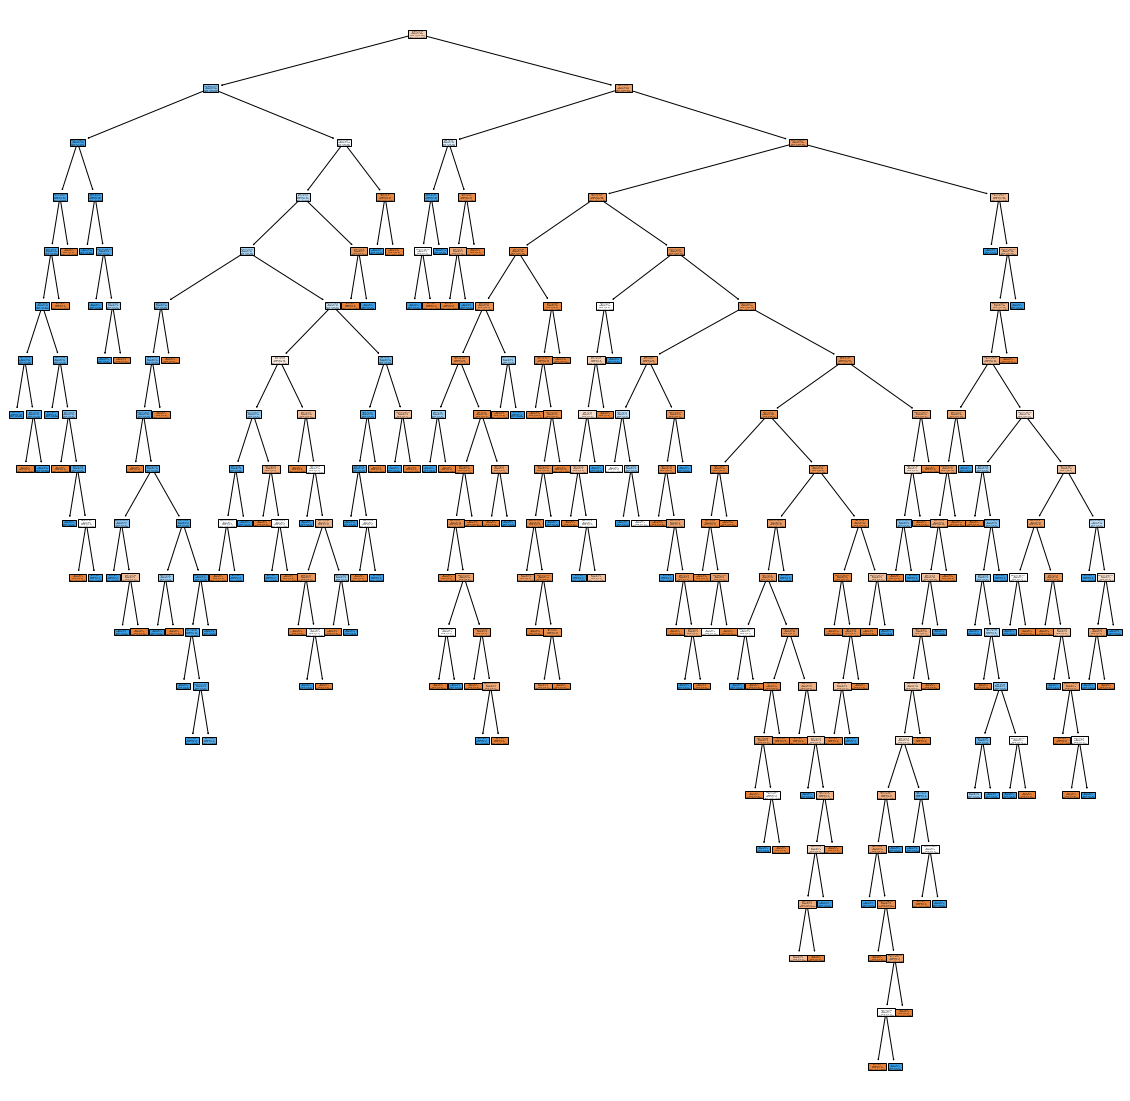

In [42]:
plt.figure(figsize=(20,20))
features = data_clean.columns
classes = ['Not Survived','Survived']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [26]:
#prePruining
#limiting the growth of decision tree in the very beginning. 
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

In [28]:
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [31]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [36]:

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.842814371257485
Test score 0.8385650224215246


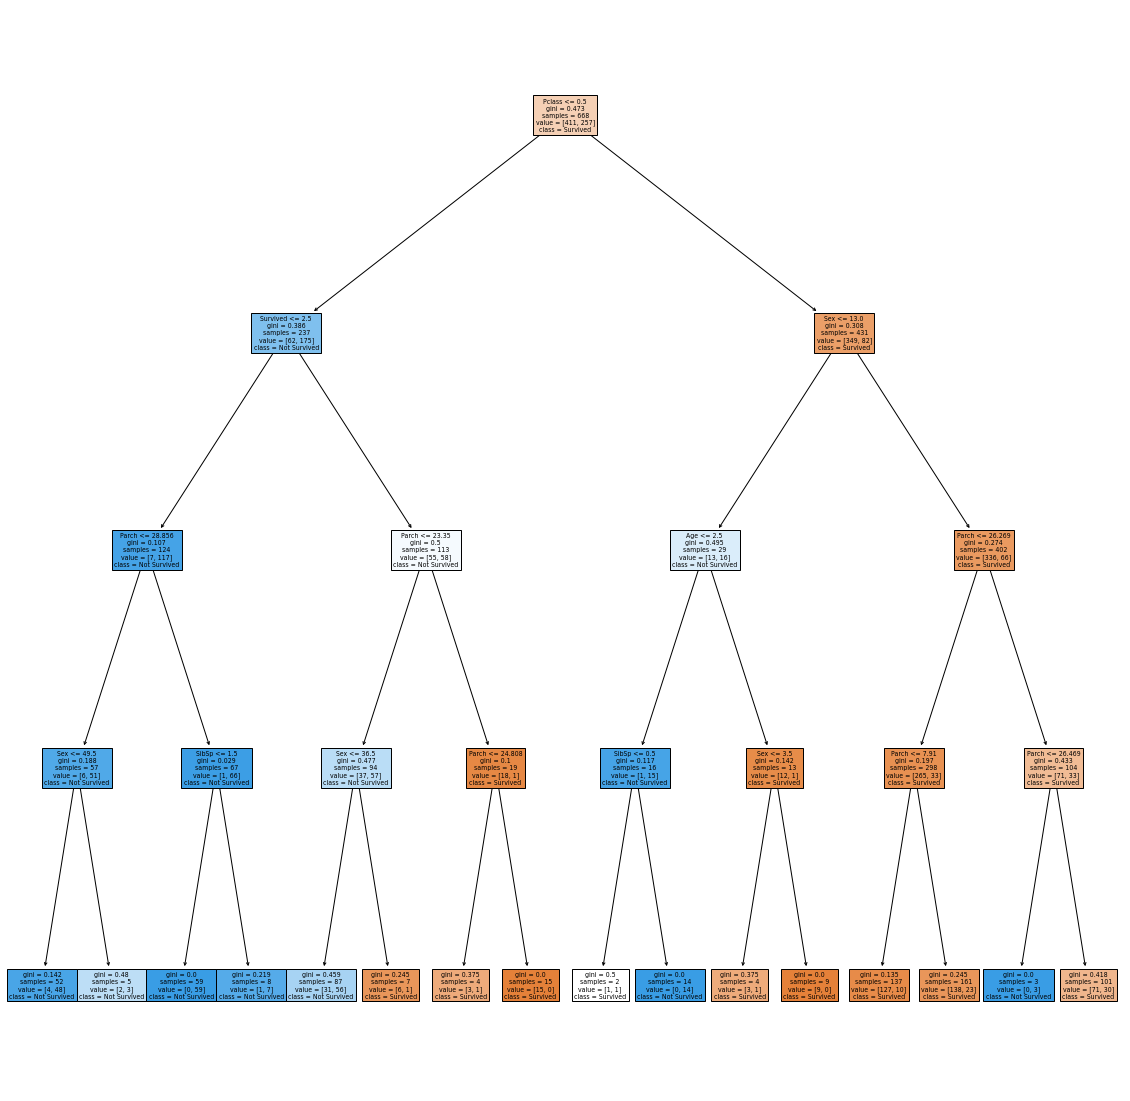

In [37]:
plt.figure(figsize=(20,20))
features = data_clean.columns
classes = ['Survived','Not Survived']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()